In [9]:
import json
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
table = str.maketrans('','',string.punctuation)
with open("Sarcasm_Headlines_Dataset.json", 'r') as f:
  datastore = [json.loads(line) for line in f]
sentences = []
labels = []
urls = []
for item in datastore:
  sentence = item['headline'].lower()
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("/", " / ")
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  words = sentence.split()
  filtered_sentence = ""
  for word in words:
   word = word.translate(table)
   if word not in stopwords:
     filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
sentences[2]
labels[2]
urls[2]
  

'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697'

In [65]:
training_size = 25000
tr_sentences = sentences[0:training_size]
tr_labels = labels[0:training_size]
t_sentences = sentences[training_size:]
t_labels = labels[training_size:]

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20000,oov_token = '<OOV>')

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer.fit_on_texts(sentences)

In [66]:
tr_sequences = tokenizer.texts_to_sequences(tr_sentences)
t_sequences = tokenizer.texts_to_sequences(t_sentences)

In [48]:
tr_padded = pad_sequences(tr_sequences,padding='post',maxlen=10)

In [67]:
t_padded = pad_sequences(t_sequences,padding = 'post',maxlen=10)

In [50]:
import numpy as np

In [68]:
tr_padded = np.array(tr_padded)
tr_labels = np.array(tr_labels)
t_padded = np.array(t_padded)
t_labels = np.array(t_labels)

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense

In [59]:
import tensorflow
model = Sequential([
                    Embedding(20000,16),
                    GlobalAveragePooling1D(),
                    Dense(units = 24,activation = tensorflow.nn.relu),
                    Dense(units = 1,activation = tensorflow.nn.sigmoid )
])

In [60]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          320000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 320,433
Trainable params: 320,433
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(tr_padded,tr_labels, epochs=15)

Epoch 1/15
782/782 [==============================] - 5s 7ms/step - loss: 0.1010 - accuracy: 0.9647
Epoch 2/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0834 - accuracy: 0.9709
Epoch 3/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0680 - accuracy: 0.9770
Epoch 4/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0583 - accuracy: 0.9802
Epoch 5/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0488 - accuracy: 0.9831
Epoch 6/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0412 - accuracy: 0.9870
Epoch 7/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0375 - accuracy: 0.9877
Epoch 8/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 9/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 10/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0232 - accuracy: 0.9923

In [69]:
model.evaluate(t_padded,t_labels)

54/54 [==============================] - 0s 2ms/step - loss: 2.0799 - accuracy: 0.7560


[2.079906940460205, 0.7559976577758789]

In [72]:
adam_new = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001,beta_1=0.1,beta_2=0.999,amsgrad= False)

In [73]:
model.compile(optimizer = adam_new,loss= 'binary_crossentropy',metrics = ['accuracy'])

In [74]:
model.fit(tr_padded,tr_labels,epochs = 40)

Epoch 1/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0068 - accuracy: 0.9984
Epoch 2/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 3/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0045 - accuracy: 0.9991
Epoch 4/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 5/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 6/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 7/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 8/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 9/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 10/40
782/782 [==============================] - 5s 6ms/step - loss: 0.0023 - accuracy: 0.9995

In [75]:
model.evaluate(t_padded,t_labels)

54/54 [==============================] - 0s 3ms/step - loss: 3.3250 - accuracy: 0.7501


[3.324982166290283, 0.7501462697982788]

In [76]:
wc = tokenizer.word_counts
print(wc)

OrderedDict([('former', 212), ('versace', 2), ('store', 110), ('clerk', 22), ('sues', 34), ('secret', 182), ('black', 534), ('code', 38), ('minority', 30), ('shoppers', 6), ('roseanne', 6), ('revival', 22), ('catches', 28), ('thorny', 6), ('political', 166), ('mood', 26), ('better', 248), ('worse', 80), ('mom', 396), ('starting', 90), ('fear', 92), ('sons', 72), ('web', 38), ('series', 124), ('closest', 14), ('thing', 288), ('grandchild', 4), ('boehner', 54), ('wants', 278), ('wife', 168), ('listen', 48), ('come', 208), ('alternative', 26), ('debt', 58), ('reduction', 8), ('ideas', 86), ('j', 96), ('k', 94), ('rowling', 14), ('wishes', 84), ('snape', 4), ('happy', 128), ('birthday', 128), ('magical', 64), ('way', 532), ('advancing', 4), ('worlds', 186), ('women', 658), ('fascinating', 8), ('case', 188), ('eating', 150), ('lab', 16), ('grown', 36), ('meat', 56), ('ceo', 146), ('send', 70), ('kids', 394), ('school', 494), ('work', 374), ('company', 188), ('top', 252), ('snake', 20), ('ha

In [77]:
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(),key =lambda t:t[1],reverse = True)))

In [78]:
print(newlist)

OrderedDict([('new', 3046), ('trump', 2590), ('man', 2532), ('one', 1080), ('report', 1028), ('year', 1026), ('area', 980), ('donald', 944), ('u', 940), ('day', 930), ('says', 906), ('woman', 888), ('first', 870), ('time', 866), ('like', 814), ('get', 794), ('trumps', 782), ('old', 774), ('people', 754), ('life', 752), ('obama', 724), ('house', 702), ('make', 666), ('still', 664), ('women', 658), ('white', 658), ('back', 652), ('clinton', 618), ('5', 594), ('world', 582), ('years', 570), ('could', 562), ('family', 550), ('americans', 542), ('black', 534), ('way', 532), ('american', 500), ('gop', 498), ('study', 496), ('school', 494), ('best', 488), ('bill', 482), ('3', 478), ('would', 476), ('police', 468), ('show', 468), ('watch', 466), ('really', 460), ('last', 454), ('cant', 450), ('home', 450), ('know', 448), ('death', 446), ('10', 446), ('president', 440), ('good', 438), ('things', 434), ('state', 432), ('video', 430), ('finds', 430), ('going', 426), ('2', 424), ('nation', 422), (

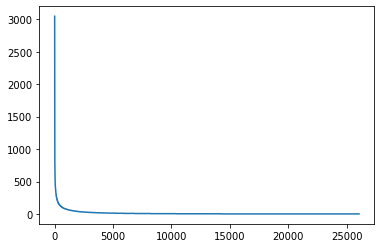

In [79]:
import matplotlib.pyplot as plt
xs=[]
ys=[]
curr_x = 1
for item in newlist:
 xs.append(curr_x)
 curr_x=curr_x+1
 ys.append(newlist[item])
plt.plot(xs,ys)
plt.show()

In [80]:
#To reduce overfitting we can shorten are vocab size to 2000, so that words are used more will help in classification more

In [82]:
reverse_word_index =  dict([(value,key) for (key,value) in tokenizer.word_index.items()])

In [84]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(20000, 16)


In [85]:
print(reverse_word_index[2])
print(weights[2])

new
[-0.04238309 -0.026656   -0.07716266  0.04805348 -0.02395847  0.14134307
 -0.04415102 -0.07212804  0.03460502  0.02643702 -0.00197837  0.01811693
 -0.0081803  -0.04785454 -0.03527152  0.10668318]


In [90]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 20000):
 word = reverse_word_index[word_num]
 embeddings = weights[word_num]
 out_m.write(word + "\n")
 out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [92]:
from google.colab import files
files.download('vecs.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>